# CitiBike `csp` example

Let's take a look at the CitiBike historical data. The API is zipped csv files hosted via S3. We'll start by downloading some data via a little utility library (also available as a CLI), then loading it with pandas.

In [1]:
from csp_citibike import download_data, load_data

In [2]:
df = download_data(2024, 3)

/Users/timkpaine/Developer/projects/point72/csp-citibike/csp_citibike/historical/download.py:48: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(all_csv_path)


In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8841BC065EE0B1DC,electric_bike,2024-03-01 00:00:02,2024-03-01 00:27:39,W 30 St & 8 Ave,6373.07,Maiden Ln & Pearl St,5065.10,40.749614,-73.995071,40.707065,-74.007319,member
1,7940CEB82EC0DEBA,electric_bike,2024-03-01 00:00:04,2024-03-01 00:09:29,Longwood Ave & Southern Blvd,7849.1,Lincoln Ave & E 138 St,7744.06,40.816459,-73.896576,40.810893,-73.927311,member
2,D4F7D86D5C72BED7,classic_bike,2024-03-01 00:00:05,2024-03-01 00:31:02,W 30 St & 8 Ave,6373.07,Broadway & Morris St,5033.01,40.749653,-73.995208,40.705945,-74.013219,member
3,26E3A12D6D7954C7,electric_bike,2024-03-01 00:00:05,2024-03-01 00:03:34,Broadway & W 29 St,6289.06,Broadway & W 25 St,6173.08,40.746424,-73.988559,40.742869,-73.989186,casual
4,4F121967BC57CC4D,electric_bike,2024-03-01 00:00:09,2024-03-01 00:11:42,DeKalb Ave & Franklin Ave,4528.01,6 St & 7 Ave,3834.1,40.690670,-73.957559,40.668663,-73.979881,member


Let's do a little plotting. Let's figure out the most popular starting and ending stations, and show them on a map.

In [4]:
import seaborn as sns
sns.set(style='ticks')

In [5]:
ride_starts = df.groupby("start_station_name")[["ride_id", "start_lat", "start_lng"]]      \
                .agg({"ride_id": "count", "start_lat": "first", "start_lng": "first"})     \
                .sort_values(["ride_id"], ascending=False)                                 \
                .rename(columns= {'ride_id': 'ride_start_counts'})

ride_ends = df.groupby("end_station_name")[["ride_id", "end_lat", "end_lng"]]              \
              .agg({"ride_id": "count", "end_lat": "first", "end_lng": "first"})           \
              .sort_values(["ride_id"], ascending=False)                                   \
              .rename(columns= {'ride_id': 'ride_end_counts'})

In [6]:
ride_starts.head(20)

,ride_start_counts,start_lat,start_lng
start_station_name,,,
W 21 St & 6 Ave,11195,40.741740,-73.994156
Forsyth St & Broome St,10164,40.718939,-73.992663
Broadway & W 58 St,10026,40.766188,-73.982188
8 Ave & W 31 St,9182,40.750401,-73.994882
Delancey St & Eldridge St,9087,40.719393,-73.991509
Broadway & W 25 St,8885,40.742672,-73.988953
1 Ave & E 68 St,8580,40.764802,-73.958246
W 31 St & 7 Ave,8125,40.749156,-73.991600
University Pl & E 14 St,7992,40.734639,-73.992213


In [7]:
ride_ends.head(20)

,ride_end_counts,end_lat,end_lng
end_station_name,,,
W 21 St & 6 Ave,11283,40.741740,-73.994156
Forsyth St & Broome St,10248,40.718939,-73.992663
Broadway & W 58 St,10025,40.766953,-73.981693
8 Ave & W 31 St,9136,40.750585,-73.994685
Delancey St & Eldridge St,9109,40.719383,-73.991479
Broadway & W 25 St,8883,40.742869,-73.989186
1 Ave & E 68 St,8621,40.765005,-73.958185
W 31 St & 7 Ave,8115,40.749156,-73.991600
University Pl & E 14 St,8020,40.734814,-73.992085


Now let's look at the most popular starting and ending destinations in a scatter plot

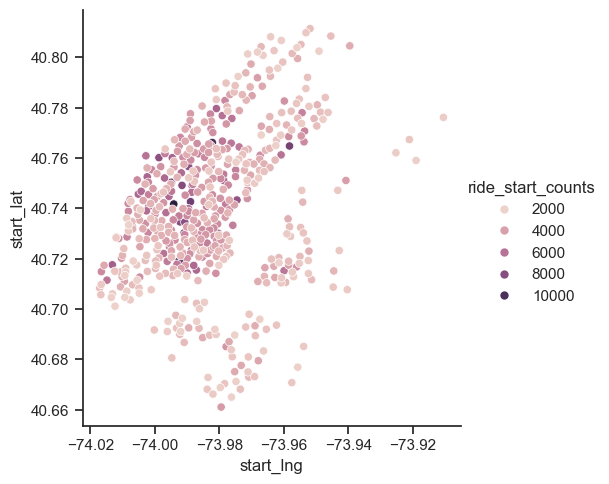

In [8]:
sns.relplot(ride_starts.head(500), x="start_lng", y="start_lat", hue="ride_start_counts")

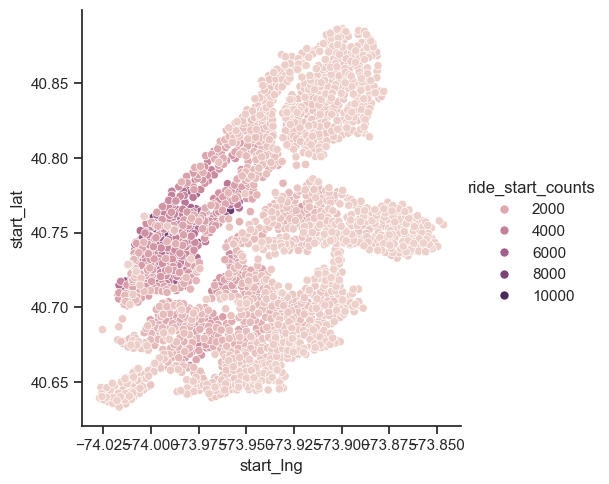

In [9]:
sns.relplot(ride_starts, x="start_lng", y="start_lat", hue="ride_start_counts")

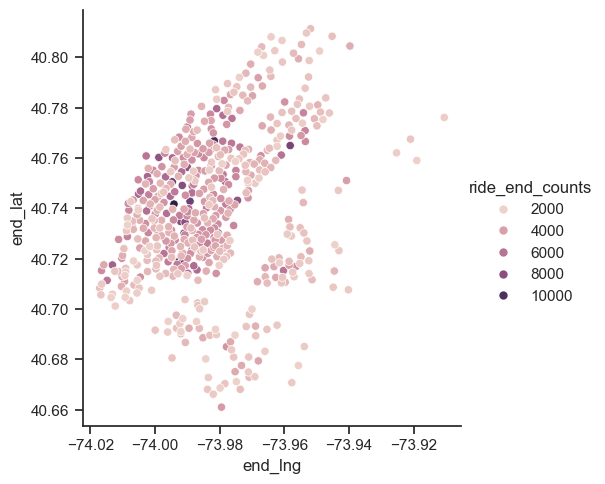

In [10]:
sns.relplot(ride_ends.head(500), x="end_lng", y="end_lat", hue="ride_end_counts")

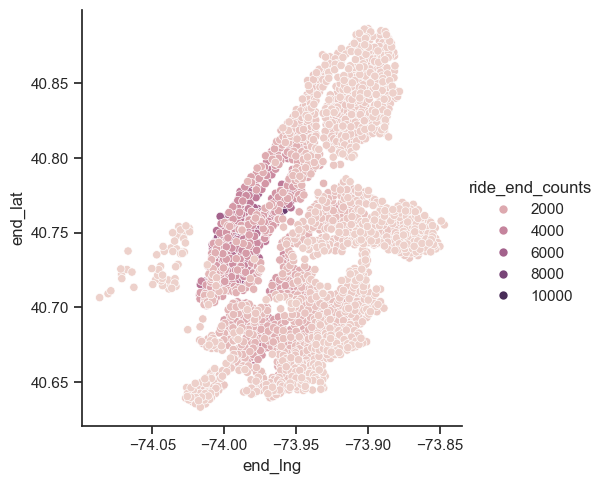

In [11]:
sns.relplot(ride_ends, x="end_lng", y="end_lat", hue="ride_end_counts")

## CSP
Now let's analyze the same data with `csp`. We will stream through 1 day of historical data (March 1, 2024), and we will calculate a 30 minute window of new bike rides.

In [12]:
import csp
from csp import ts
from datetime import datetime, timedelta
from csp_citibike import download_data, CSVAdapter
import matplotlib.pyplot as plt

In [13]:
data_path = download_data(2024, 3, as_df=False)
data_path

'/Users/timkpaine/Developer/projects/point72/csp-citibike/csp_citibike/historical/raw_data/202403-citibike-tripdata/all.csv'

In this node, we split out to count bike rides by either classic bike or electric bike

In [14]:
@csp.node
def splitter(trip: ts[dict]) -> csp.Outputs(bikes=ts[int], ebikes=ts[int]):
    if trip["rideable_type"] == "classic_bike":
        csp.output(bikes=1)
    if trip["rideable_type"] == "electric_bike":
        csp.output(ebikes=1)

In this graph, we calculate a rolling count of all new bike starts in a 30 minute window, and then add this data as outputs of our graph

In [15]:
@csp.graph
def my_graph():
    trips = CSVAdapter(data_path, datetime_columns=["started_at", "ended_at"])
    bike_split = splitter(trips)

    bike_count_rolling_window = csp.stats.count(bike_split.bikes, interval=timedelta(minutes=30))
    ebike_count_rolling_window = csp.stats.count(bike_split.ebikes, interval=timedelta(minutes=30))

    # csp.print("bikes", bike_count_rolling_window)
    # csp.print("ebikes", ebike_count_rolling_window)

    csp.add_graph_output("bikes", bike_count_rolling_window)
    csp.add_graph_output("ebikes", ebike_count_rolling_window)

Finally, we run our graph on 1 day of data

In [16]:
output = csp.run(my_graph, starttime=datetime(2024, 3, 1), endtime=datetime(2024, 3, 2))

In [17]:
def plot_data(data):
    fig, axes = plt.subplots(2, 1, figsize=(13,8))
    
    bikes_fig1 = axes[0].plot([_[0] for _ in data["bikes"]], [_[1] for _ in data["bikes"]], label="bikes")
    bikes_fig2 = axes[1].plot([_[0] for _ in data["bikes"]], [_[1] for _ in data["bikes"]], label="bikes")
    
    ebikes_fig1 = axes[0].plot([_[0] for _ in data["ebikes"]], [_[1] for _ in data["ebikes"]], label="ebikes", color="red")
    axes_splity = axes[1].twinx()
    ebikes_fig2 = axes_splity.plot([_[0] for _ in data["ebikes"]], [_[1] for _ in data["ebikes"]], label="ebikes", color="red")
    
    lns_fig2 = bikes_fig2 + ebikes_fig2
    labs_fig2 = [l.get_label() for l in lns_fig2]
    
    axes[0].grid()
    axes[1].grid()
    axes[0].legend()
    axes_splity.legend(lns_fig2, labs_fig2)
    axes[0].set_ylabel("Trips Started (30m)")
    axes[1].set_ylabel("Trips Started (30m)")

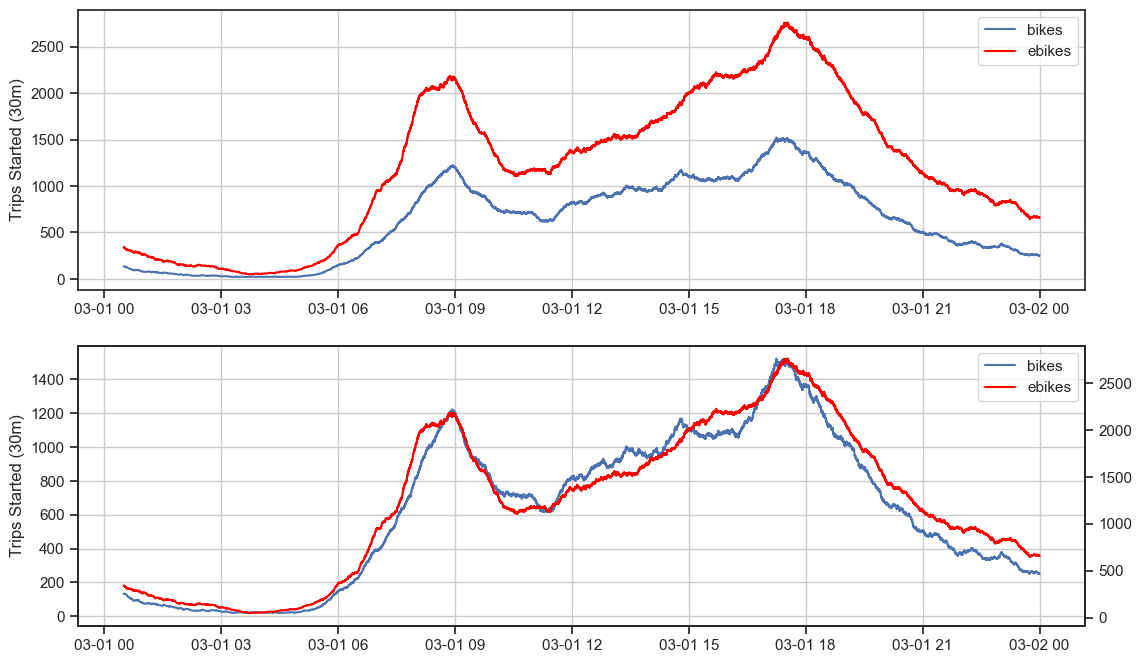

In [18]:
plot_data(output)

Let's run from March 4th to March 8th, a full work-week of data

In [19]:
output = csp.run(my_graph, starttime=datetime(2024, 3, 4), endtime=datetime(2024, 3, 9))

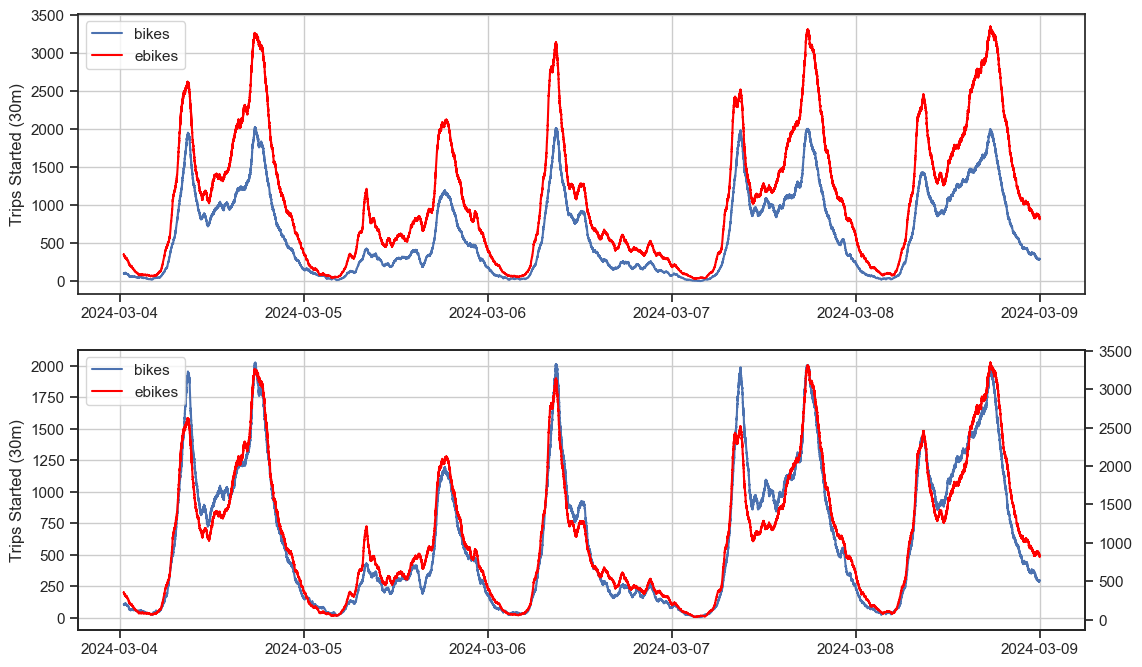

In [20]:
plot_data(output)